# House Prices Prediction
My focus in this project is to do the following and not into visualization.
    - Do a high level analysis of the data and work on impute method
    - Tryout XGBoost for the first time to predict the house prices based on key predictors.

This is just a first step in my prediction. Would like to look at at kernels that have tried out other methods like lasso, ensembling etc.

## 1) Data Preparation/Data Munging 

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ptrain = pd.read_csv('train.csv')
ptest = pd.read_csv('test.csv')

In [3]:
ptrain.shape, ptest.shape

((1460, 81), (1459, 80))

In [4]:
ptrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Understanding Data types

In [5]:
ptrain.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
numerical = ptrain.dtypes[ptrain.dtypes != 'object' ].index
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
categorical = ptrain.dtypes[ptrain.dtypes == 'object'].index

Price dataset 80 features for 1460 homes.
  - 43 categorical features
  - 38 numerical features (35 int and 3 float)

## 2) Data Processing

## 2.1) Missing Data 

In [8]:
ptrain.isnull().sum()[ptrain.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
ptest.isnull().sum()[ptest.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
# how many total missing values do we have?
total_cells = np.product(ptrain.shape)
total_missing = ptrain.isnull().sum().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

5.8895653644512089

Only 6% of the data is missing

### Features with NA as Not Applicable or No. Lets replace those values with None. The impacted features are
    - Alley - NA is No Alley. 
    - BsmtQual - No basement    
    - BsmtCond - No basement  
    - BsmtExposure - No basement  
    - BsmtFinType1 - No basement  
    - BsmtFinType2 - No basement  
    - GarageType - No garage  
    - GarageFinish - No garage  
    - GarageQual - No garage  
    - GarageCond - No garage  
    - PoolQC - No pool  
    - Fence - No fence  
    - MiscFeature - No misc features  

### Alley

In [11]:
ptrain.Alley.isnull().sum(), ptest.Alley.isnull().sum()

(1369, 1352)

In [12]:
ptrain['Alley'].fillna('None', inplace=True)
ptest['Alley'].fillna('None', inplace=True)

In [13]:
print('Train Dataset\n', ptrain.Alley.value_counts(), '\nTest Dataset\n', ptest.Alley.value_counts())

Train Dataset
 None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 
Test Dataset
 None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [14]:
print('BsmtQual-Train', ptrain.BsmtQual.isnull().sum(), 'BsmtQual-Test', ptest.BsmtQual.isnull().sum(),'\n'
      'BsmtCond-Train', ptrain.BsmtCond.isnull().sum(), 'BsmtCond-Test', ptest.BsmtCond.isnull().sum(),'\n'
      'BsmtExposure-Train', ptrain.BsmtExposure.isnull().sum(),'BsmtExposure-Test', ptest.BsmtExposure.isnull().sum(),'\n'
      'BsmtFinType1-Train', ptrain.BsmtFinType1.isnull().sum(), 'BsmtFinType1-Test', ptest.BsmtFinType1.isnull().sum(),'\n'
      'BsmtFinType2-Train', ptrain.BsmtFinType2.isnull().sum(), 'BsmtFinType2-Test', ptest.BsmtFinType2.isnull().sum())

BsmtQual-Train 37 BsmtQual-Test 44 
BsmtCond-Train 37 BsmtCond-Test 45 
BsmtExposure-Train 38 BsmtExposure-Test 44 
BsmtFinType1-Train 37 BsmtFinType1-Test 42 
BsmtFinType2-Train 38 BsmtFinType2-Test 42


In [15]:
ptrain['BsmtQual'].fillna('NoBasement', inplace=True)
ptest['BsmtQual'].fillna('NoBasement', inplace=True)
ptrain['BsmtCond'].fillna('NoBasement', inplace=True)
ptest['BsmtCond'].fillna('NoBasement', inplace=True)
ptrain['BsmtExposure'].fillna('NoBasement', inplace=True)
ptest['BsmtExposure'].fillna('NoBasement', inplace=True)
ptrain['BsmtFinType1'].fillna('NoBasement', inplace=True)
ptest['BsmtFinType1'].fillna('NoBasement', inplace=True)
ptrain['BsmtFinType2'].fillna('NoBasement', inplace=True)
ptest['BsmtFinType2'].fillna('NoBasement', inplace=True)

In [16]:
print('BsmtQual-Train', ptrain.BsmtQual.isnull().sum(), 'BsmtQual-Test', ptest.BsmtQual.isnull().sum(),'\n'
      'BsmtCond-Train', ptrain.BsmtCond.isnull().sum(), 'BsmtCond-Test', ptest.BsmtCond.isnull().sum(),'\n'
      'BsmtExposure-Train', ptrain.BsmtExposure.isnull().sum(),'BsmtExposure-Test', ptest.BsmtExposure.isnull().sum(),'\n'
      'BsmtFinType1-Train', ptrain.BsmtFinType1.isnull().sum(), 'BsmtFinType1-Test', ptest.BsmtFinType1.isnull().sum(),'\n'
      'BsmtFinType2-Train', ptrain.BsmtFinType2.isnull().sum(), 'BsmtFinType2-Test', ptest.BsmtFinType2.isnull().sum())

BsmtQual-Train 0 BsmtQual-Test 0 
BsmtCond-Train 0 BsmtCond-Test 0 
BsmtExposure-Train 0 BsmtExposure-Test 0 
BsmtFinType1-Train 0 BsmtFinType1-Test 0 
BsmtFinType2-Train 0 BsmtFinType2-Test 0


###  GarageType, GarageFinish, GarageQual, GarageCond

In [17]:
print('GarageType-Train', ptrain.GarageType.isnull().sum(), 'GarageType-Test', ptest.GarageType.isnull().sum(),'\n'
      'GarageFinish-Train', ptrain.GarageFinish.isnull().sum(), 'GarageFinish-Test', ptest.GarageFinish.isnull().sum(),'\n'
      'GarageQual-Train', ptrain.GarageQual.isnull().sum(),'GarageQual-Test', ptest.GarageQual.isnull().sum(),'\n'
      'GarageCond-Train', ptrain.GarageCond.isnull().sum(), 'GarageCond-Test', ptest.GarageCond.isnull().sum())

GarageType-Train 81 GarageType-Test 76 
GarageFinish-Train 81 GarageFinish-Test 78 
GarageQual-Train 81 GarageQual-Test 78 
GarageCond-Train 81 GarageCond-Test 78


In [18]:
ptrain['GarageType'].fillna('NoGarage', inplace=True)
ptest['GarageType'].fillna('NoGarage', inplace=True)
ptrain['GarageFinish'].fillna('NoGarage', inplace=True)
ptest['GarageFinish'].fillna('NoGarage', inplace=True)
ptrain['GarageQual'].fillna('NoGarage', inplace=True)
ptest['GarageQual'].fillna('NoGarage', inplace=True)
ptrain['GarageCond'].fillna('NoGarage', inplace=True)
ptest['GarageCond'].fillna('NoGarage', inplace=True)

In [19]:
print('GarageType-Train', ptrain.GarageType.isnull().sum(), 'GarageType-Test', ptest.GarageType.isnull().sum(),'\n'
      'GarageFinish-Train', ptrain.GarageFinish.isnull().sum(), 'GarageFinish-Test', ptest.GarageFinish.isnull().sum(),'\n'
      'GarageQual-Train', ptrain.GarageQual.isnull().sum(),'GarageQual-Test', ptest.GarageQual.isnull().sum(),'\n'
      'GarageCond-Train', ptrain.GarageCond.isnull().sum(), 'GarageCond-Test', ptest.GarageCond.isnull().sum())

GarageType-Train 0 GarageType-Test 0 
GarageFinish-Train 0 GarageFinish-Test 0 
GarageQual-Train 0 GarageQual-Test 0 
GarageCond-Train 0 GarageCond-Test 0


### PoolQC, Fence, MiscFeature 

In [20]:
print('PoolQC-Train', ptrain.PoolQC.isnull().sum(), 'PoolQC-Test', ptest.PoolQC.isnull().sum(),'\n'
      'Fence-Train', ptrain.Fence.isnull().sum(), 'Fence-Test', ptest.Fence.isnull().sum(),'\n'
      'MiscFeature-Train', ptrain.MiscFeature.isnull().sum(),'MiscFeature-Test', ptest.MiscFeature.isnull().sum())

PoolQC-Train 1453 PoolQC-Test 1456 
Fence-Train 1179 Fence-Test 1169 
MiscFeature-Train 1406 MiscFeature-Test 1408


In [21]:
ptrain['PoolQC'].fillna('None', inplace=True)
ptest['PoolQC'].fillna('None', inplace=True)
ptrain['Fence'].fillna('None', inplace=True)
ptest['Fence'].fillna('None', inplace=True)
ptrain['MiscFeature'].fillna('None', inplace=True)
ptest['MiscFeature'].fillna('None', inplace=True)

In [22]:
print('PoolQC-Train', ptrain.PoolQC.isnull().sum(), 'PoolQC-Test', ptest.PoolQC.isnull().sum(),'\n'
      'Fence-Train', ptrain.Fence.isnull().sum(), 'Fence-Test', ptest.Fence.isnull().sum(),'\n'
      'MiscFeature-Train', ptrain.MiscFeature.isnull().sum(),'MiscFeature-Test', ptest.MiscFeature.isnull().sum())

PoolQC-Train 0 PoolQC-Test 0 
Fence-Train 0 Fence-Test 0 
MiscFeature-Train 0 MiscFeature-Test 0


In [23]:
ptrain.isnull().sum()[ptrain.isnull().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu    690
GarageYrBlt     81
dtype: int64

In [24]:
ptest.isnull().sum()[ptest.isnull().sum()>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

### Impute the missing values
I'm going to follow the steps by Dan from https://www.kaggle.com/dansbecker/handling-missing-values

In [25]:
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

The following are the numerical features from ptest:  
- LotFrontage  
- MasVnrArea    
- BsmtFinSF1  
- BsmtFinSF2  
- BsmtUnfSF   
- TotalBsmtSF  
- BsmtFullBath  
- BsmtHalfBath  
- GarageYrBlt  
- GarageCars  
- GarageArea  
The following are the categorical features from ptest:  
- MSZoning   
- Utilities   
- Exterior1st  
- Exterior2nd  
- MasVnrType   
- KitchenQual  
- Functional  
- FireplaceQu  
- SaleType   
The following are the numerical features from ptrain:  
- MasVnrType  
- Electrical  
- FireplaceQu  
The following are the categorical features from ptrain:  
- LotFrontage    
- MasVnrArea    
- GarageYrBlt   

In [26]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

In [27]:
ptest[['LotFrontage','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea']] = my_imputer.fit_transform(ptest[['LotFrontage','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea']])

In [28]:
ptest.isnull().sum()[ptest.isnull().sum()>0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
KitchenQual      1
Functional       2
FireplaceQu    730
SaleType         1
dtype: int64

In [29]:
ptrain[['LotFrontage','MasVnrArea', 'GarageYrBlt']] = my_imputer.fit_transform(ptrain[['LotFrontage','MasVnrArea','GarageYrBlt']])

In [30]:
ptrain.isnull().sum()[ptrain.isnull().sum()>0]

MasVnrType       8
Electrical       1
FireplaceQu    690
dtype: int64

In [31]:
ptest = ptest.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [32]:
ptest.isnull().sum()[ptest.isnull().sum()>0]

Series([], dtype: int64)

In [33]:
ptrain = ptrain.apply(lambda x:x.fillna(x.value_counts().index[0]))
ptrain.isnull().sum()[ptrain.isnull().sum()>0]

Series([], dtype: int64)

### 2.2) Data Interpretation via Visualization
Lets learn about our data via visualization.

### Distribution of data via Density Plots

In [34]:
#Considering only the features that have impact on SalePrice
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
           '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

In [35]:
for x in columns:
    if ptrain[columns].describe()[x]['max'] < 100:
        print("lt100",x, ptrain[columns].describe()[x]['min'], ptrain[columns].describe()[x]['max'])
for x in columns:
    if (ptrain[columns].describe()[x]['max'] >= 100 and ptrain[columns].describe()[x]['max'] <1000):
        print("lt1000",x, ptrain[columns].describe()[x]['min'], ptrain[columns].describe()[x]['max'])  
for x in columns:        
    if (ptrain[columns].describe()[x]['max'] >= 1000 and ptrain[columns].describe()[x]['max'] < 10000):
        print("bet10000",x, ptrain[columns].describe()[x]['min'], ptrain[columns].describe()[x]['max'])
for x in columns:        
    if (ptrain[columns].describe()[x]['max'] >= 10000):
        print("gt10000",x, ptrain[columns].describe()[x]['min'], ptrain[columns].describe()[x]['max'])        

lt100 OverallQual 1.0 10.0
lt100 GarageCars 0.0 4.0
lt100 FullBath 0.0 3.0
lt100 TotRmsAbvGrd 2.0 14.0
bet10000 GrLivArea 334.0 5642.0
bet10000 GarageArea 0.0 1418.0
bet10000 TotalBsmtSF 0.0 6110.0
bet10000 1stFlrSF 334.0 4692.0
bet10000 YearBuilt 1872.0 2010.0
bet10000 YearRemodAdd 1950.0 2010.0
gt10000 SalePrice 34900.0 755000.0


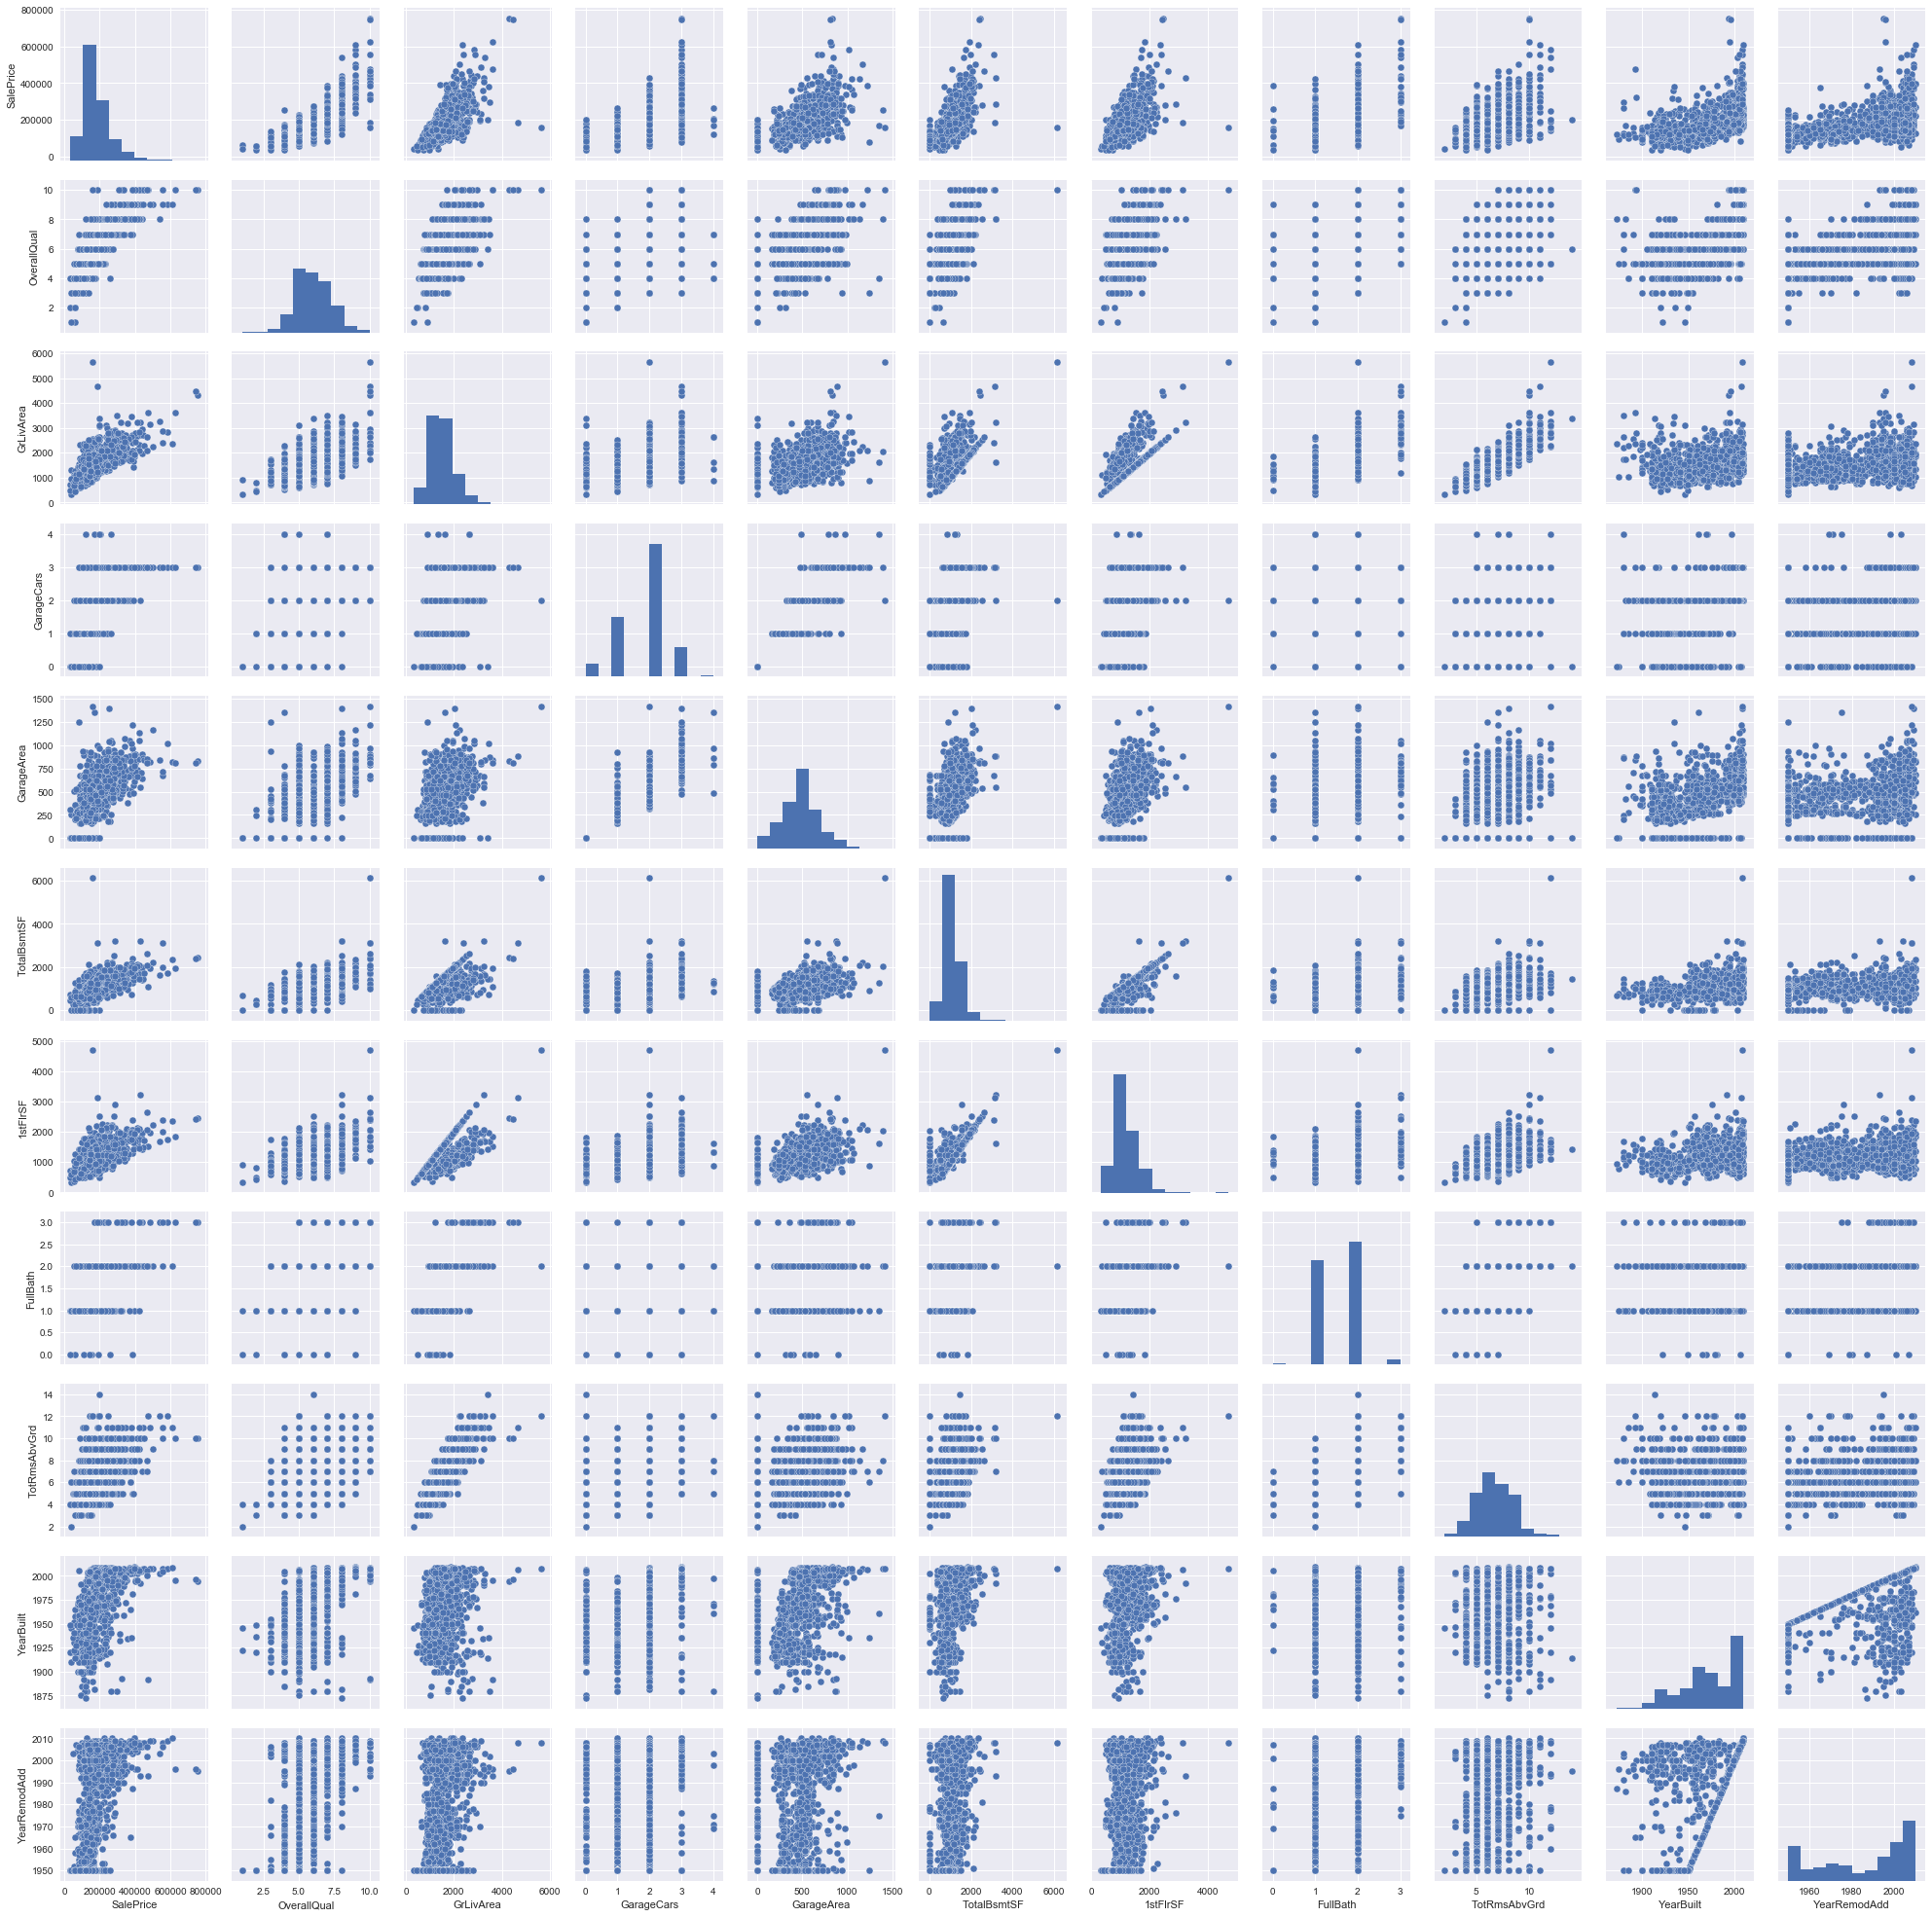

In [36]:
sns.pairplot(ptrain[columns])

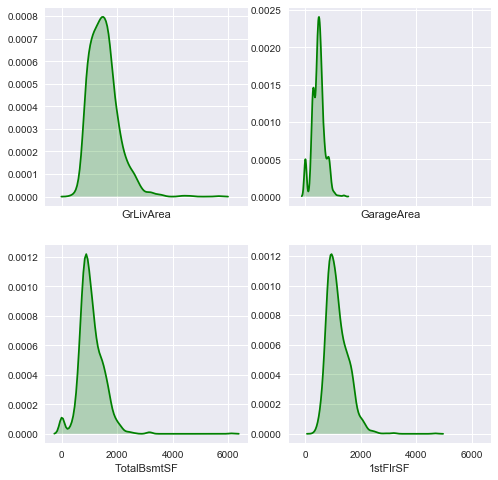

In [37]:
columns1 = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
fig, axes =plt.subplots(2,2, figsize=(8,8), sharex=True)
axes = axes.flatten()
for ax, x in zip(axes, columns1):
    sns.distplot(ptrain[x], hist=False, color="g", kde_kws={"shade": True}, ax=ax)
plt.show()    

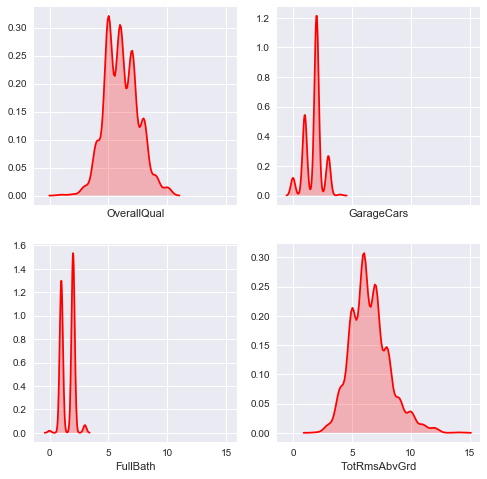

In [38]:
columns2 = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']
fig, axes =plt.subplots(2,2, figsize=(8,8), sharex=True)
axes = axes.flatten()
for ax, x in zip(axes, columns2):
    #ptrain[x].plot(kind='density', ax=ax)
    sns.distplot(ptrain[x], hist=False, color="r", kde_kws={"shade": True}, ax=ax)
plt.show()    

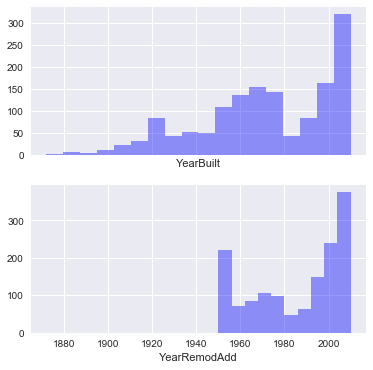

In [39]:
columns3 = ['YearBuilt', 'YearRemodAdd']
fig, axes =plt.subplots(2,1, figsize=(6,6), sharex=True)
axes = axes.flatten()
for ax, x in zip(axes, columns3):
    #ptrain[x].plot(kind='density', ax=ax, sharex=False)
    sns.distplot(ptrain[x], kde=False, color="b", ax=ax)
    #sns.distplot(ptrain[x], hist=False, color="g", kde_kws={"shade": True}, ax=ax)
plt.show()    

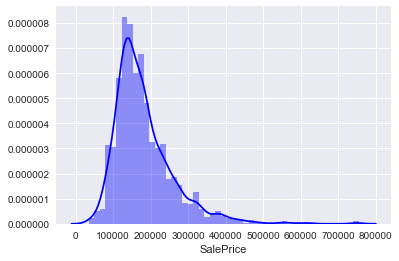

In [40]:
sns.distplot(ptrain['SalePrice'], color="b")

#### Determining correlation wrt SalesPrice
Correlation coefficients helps in measuring how strong a relationship is between two variables.

In [42]:
print("Moderate to Strong Positive Correlation")
ptrain.corr()['SalePrice'][ptrain.corr()['SalePrice']>0.5].sort_values(ascending=False)

Moderate to Strong Positive Correlation


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

#### Key features impacting the sale price:   
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF,  FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd     


In [43]:
print("Negative Correlation")
ptrain.corr()['SalePrice'][ptrain.corr()['SalePrice']<-0.3].sort_values(ascending=False)

Negative Correlation


Series([], Name: SalePrice, dtype: float64)

### Encoding of categorical variables 

In [44]:
ptrain.dtypes[ptrain.dtypes == 'object' ].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
ptest.dtypes[ptest.dtypes == 'object' ].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
for col in categorical:
    ptrain = pd.concat([ptrain, pd.get_dummies(ptrain[col], prefix = col)], axis=1)

In [47]:
ptrain.drop(categorical, axis=1, inplace=True)

In [48]:
for col in categorical:
    ptest = pd.concat([ptest, pd.get_dummies(ptest[col], prefix = col)], axis=1)

In [49]:
ptest.drop(categorical, axis=1, inplace=True)

In [50]:
ptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 303 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(265)
memory usage: 811.3 KB


In [51]:
print("Moderate to Strong Positive Correlation")
ptrain.corr()['SalePrice'][ptrain.corr()['SalePrice']>0.5].sort_values(ascending=False)

Moderate to Strong Positive Correlation


SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
BsmtQual_Ex       0.553105
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
Name: SalePrice, dtype: float64

#### Key features impacting the sale price:   
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF,  FullBath, BsmtQual_Ex, TotRmsAbvGrd, YearBuilt, YearRemodAdd, KitchenQual_Ex        


### Standard Scaling 

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
for col in ptrain.columns:
    ptrain[[col]] = MinMaxScaler().fit_transform(ptrain[[col]])

In [55]:
ptrain.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model

# Import Ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Metrics for root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [57]:
#Considering only the features that have impact on SalePrice
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF', 
            'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex']


In [58]:
X = ptrain[features]
y = ptrain['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)

In [59]:
scalerX = MinMaxScaler().fit(X_train)
scalery = MinMaxScaler().fit(y_train.values.reshape(-1, 1))

In [60]:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.values.reshape(-1, 1))
X_val = scalerX.transform(X_val)
y_val = scalery.transform(y_val.values.reshape(-1, 1))

In [ ]:
X_test = ptest[features]
scalerXt = MinMaxScaler().fit(X_test)
X_test = scalerX.transform(X_test)

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)
print (X_test.shape)

In [ ]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
y_pred = linear.predict(X_val)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_val, y_val) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

In [ ]:
# Use the model to make predictions
lin_predicted_prices = linear.predict(X_test)
lin_predicted_price_fin = scalery.inverse_transform(lin_predicted_prices.reshape(-1, 1))
print(lin_predicted_price_fin.ravel())

In [ ]:
#pd.DataFrame(list(zip(X.columns, linear.coef_)), columns = ['features', 'coefficients']).sort_values(by='coefficients',ascending=False)

In [ ]:
#Regression plot between SalePrice and GrLivArea
plt.figure(figsize=(8,8))
sns.regplot(x=ptrain["GrLivArea"], y=ptrain["SalePrice"], fit_reg=True)

In [ ]:
#Regression plot between SalePrice and GrLivArea
plt.figure(figsize=(8,8))
sns.regplot(x=ptrain["GrLivArea"], y=ptrain["TotalBsmtSF"], fit_reg=True)

In [ ]:
#Regression plot between SalePrice and OverallQual
plt.figure(figsize=(8,8))
sns.regplot(x=ptrain["OverallQual"], y=ptrain["SalePrice"], fit_reg=True)

In [ ]:
sns.pairplot(ptrain, x_vars=['TotalBsmtSF', 'OverallQual', '1stFlrSF', 'YearBuilt', 'GarageCars'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

In [ ]:
print(sqrt(mean_squared_error(y_val, y_pred)))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train.ravel())
price_pred = forest_model.predict(X_val)
print(mean_absolute_error(y_val, price_pred))

In [ ]:
# Use the model to make predictions
rf_predicted_price = forest_model.predict(X_test)
# We will look at the predicted prices to ensure we have something sensible.
print(rf_predicted_price)

In [ ]:
rf_predicted_price_fin = scalery.inverse_transform(rf_predicted_price.reshape(-1, 1))
print(rf_predicted_price_fin.ravel())

In [ ]:
#We save the submission as a '.csv' file
submission = pd.DataFrame({
        "Id": ptest["Id"],
        "SalePrice": y_predicted_price.ravel()
    })
submission.to_csv('rf_price_0329.csv', index=False)

### XGBoost 

In [ ]:
import os

mingw_path = 'D:\\Anaconda3\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [ ]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()


In [ ]:
X = ptrain[features]
y = ptrain['SalePrice']
X_test = ptest[features]
X_train, X_val, y_train, y_val = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.30)

In [ ]:
scalerX = MinMaxScaler().fit(X_train)
scalery = MinMaxScaler().fit(y_train.reshape(-1, 1))


X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1, 1))

X_val = scalerX.transform(X_val)
y_val = scalery.transform(y_val.reshape(-1, 1))

X_test = scalerX.transform(X_test)


In [ ]:
xg_model.fit(X_train, y_train, verbose=False)
# make predictions
xg_pred = xg_model.predict(X_val)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(xg_pred, y_val)))

In [ ]:
xg_predicted_price = xg_model.predict(X_test)
xg_predicted_price_fin = scalery.inverse_transform(xg_predicted_price.reshape(-1, 1))
print(xg_predicted_price_fin.ravel())

In [ ]:
xg_model1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xg_model1.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], verbose=False)

In [ ]:
xg_pred1 = xg_model1.predict(X_val)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(xg_pred1, y_val)))

# make predictions
xg_predicted_price1 = xg_model1.predict(X_test)
xg_predicted_price_fin1 = scalery.inverse_transform(xg_predicted_price1.reshape(-1, 1))
print(xg_predicted_price_fin.ravel())

In [ ]:
#We save the submission as a '.csv' file
submission = pd.DataFrame({
        "Id": ptest["Id"],
        "SalePrice": xg_predicted_price_fin.ravel()
    })
submission.to_csv('xg_price_0329.csv', index=False)